### **데이터 수집**  
국토 정보 플랫폼에서 다운받은 인구, 토지, 건물 데이터 정제 과정


*   경기도_총인구수 2019년 6월~2022년 6월(상반기, 하반기) 총 7시점 수집
*   경기도_공시지가 2018년 12월~2021년 6월(상반기, 하반기) 총 6시점 수집
*   경기도_건축물 2019년 6월~2022년 6월(상반기, 하반기) 총 7시점 수집

* 250m 격자 데이터로 shp파일 형식이기 때문에 qgis로 불러온 뒤 시군구, 기준년월 컬럼 생성 후 csv로 생성



### 참고 : shp to csv

* geopandas는 pandas에서 gis관련 파일을 다룰 수 있게 해주는 패키지
* 설치방법 참고 : https://blog.naver.com/PostView.nhn?blogId=kokoyou7620&logNo=222175705733

<AxesSubplot:>

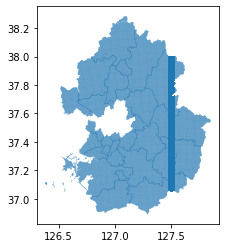

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
#해당코드를 경로를 바꿔가며 사용,변환가능

gdf = gpd.GeoDataFrame.from_file('C:/gbig/GCGF/경기도_격자_전처리데이터/경기도_총인구수_201906.shp',encoding='euc-kr')

gdf.plot()

In [ ]:
gdf.to_csv('C:/gbig/GCGF/경기도_격자_전처리데이터/경기도_총인구수_201906.csv', encoding='euc-kr', index=False)

### **코드 주요 내용**  
각 기준시점별로 저장되어 있는 데이터들을 최대 격자 데이터로 만들기 위해 첫 단계로 'gid'를 기준으로 분야별(인구, 토지, 건물)로 통합

1. 데이터 기초 통계량 확인
2. gid 중복 여부 확인 및 제거  
3. gid 기준 데이터 통합(outer join)  


In [222]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)  # FutureWarning 제거
file_path = ('C:/gbig/GCGF/경기도_격자_전처리데이터/csv/')

# 0. 데이터 불러오기

* 건물) 건축물 데이터: strc_기준년월
* 토지) 공시지가 데이터: price_기준년월
* 인구) 인구 데이터: pop_기준년월


### 1) 건축물 데이터

In [223]:
# 건축물 데이터 불러오기 전 파일 확인하기
file_list_strc = os.listdir(file_path+'건축물')
file_list_strc.sort()
file_list_strc

['경기도_건축물_201906(통합본).csv',
 '경기도_건축물_201912(통합본).csv',
 '경기도_건축물_202006(통합본).csv',
 '경기도_건축물_202012(통합본).csv',
 '경기도_건축물_202106(통합본).csv',
 '경기도_건축물_202112(통합본).csv',
 '경기도_건축물_202206(통합본).csv']

In [224]:
## 건축물 데이터 불러오기 ##

# 건축물 디렉토리 안에 있는 모든 데이터 파일 로드
file_list_strc_name = []
for i in file_list_strc:
    file_list_strc_name.append(file_path+'건축물/'+i)

#print(file_list_strc_name)

file_list_strc_ym = []
for i in range(len(file_list_strc)):
    file_list_strc_ym.append(file_list_strc[i][-15:-9]) #기준년월추출

#print(file_list_strc_ym)

# 건축물 데이터 생성 : strc_기준년월
for i in range(len(file_list_strc)):
    globals()['strc_{}'.format(file_list_strc_ym[i])] = pd.read_csv(file_list_strc_name[i], encoding='cp949')
    eval('strc_{}'.format(file_list_strc_ym[i])).rename(columns={'val':'strc'},inplace=True)
    eval('strc_{}'.format(file_list_strc_ym[i])).drop(labels='lbl',axis=1,inplace=True)



In [225]:
strc_201906

,gid,strc,시군구,기준년월,geometry
0,다바07aa99ba,NaN,안산시,201906,"POLYGON ((126.453563104927 37.089516732107, 12..."
1,다바07ab99ab,NaN,안산시,201906,"POLYGON ((126.456406578422 37.0872883197343, 1..."
2,다바07ab99ba,NaN,안산시,201906,"POLYGON ((126.456375681678 37.0895415186704, 1..."
3,다바07ab99bb,NaN,안산시,201906,"POLYGON ((126.456344781496 37.0917947167262, 1..."
4,다바07ba99ab,NaN,안산시,201906,"POLYGON ((126.459219075379 37.0873130376006, 1..."
...,...,...,...,...,...
166472,라아02bb00aa,NaN,가평군,201906,POLYGON ((127.53132213555706 37.99999582902148...
166473,라아02bb00ab,NaN,가평군,201906,POLYGON ((127.53132309397195 38.00224905328831...
166474,라아03aa00aa,NaN,가평군,201906,"POLYGON ((127.5341696019789 37.99999503619097,..."
166475,라아03ab00aa,NaN,가평군,201906,POLYGON ((127.53701706828416 37.99999417441868...


* 최종 생성된 변수들
* strc_201906 , strc_201912 ... strc_202206

In [226]:
file_list_strc_ym

['201906', '201912', '202006', '202012', '202106', '202112', '202206']

### 2) 공시지가 데이터

In [227]:
# 공시지가 데이터 불러오기 전 파일 확인하기
file_list_price = os.listdir(file_path+'공시지가')
file_list_price.sort()
file_list_price

['경기도_공시지가_201812.csv',
 '경기도_공시지가_201906.csv',
 '경기도_공시지가_201912.csv',
 '경기도_공시지가_202006.csv',
 '경기도_공시지가_202012.csv',
 '경기도_공시지가_202106.csv']

In [228]:
## 공시지가 데이터 불러오기 ##

# 공시지가 데이터 파일 이름 붙이기
file_list_price_name = []
for i in file_list_price:
    file_list_price_name.append(file_path+'공시지가/'+i)

# file_list_price_name

file_list_price_ym = []
for i in range(len(file_list_price)):
    file_list_price_ym.append(file_list_price[i][-10:-4]) #기준년월추출

#print(file_list_price_ym)

# 공시지가 데이터 생성 : price_기준년월

for i in range(len(file_list_price)):
    globals()['price_{}'.format(file_list_price_ym[i])] = pd.read_csv(file_list_price_name[i], encoding='cp949')
    eval('price_{}'.format(file_list_price_ym[i])).rename(columns={'val':'price'},inplace=True)
    eval('price_{}'.format(file_list_price_ym[i])).drop(labels='lbl',axis=1,inplace=True)


In [229]:
price_201906

,gid,price,시군구,geometry,기준년월
0,다사79ab75ba,NaN,가평군,POLYGON ((127.26436595601645 37.77894419310279...,201906
1,다사79ba75ab,NaN,가평군,POLYGON ((127.26721196476568 37.77669654431724...,201906
2,다사79ba75ba,NaN,가평군,POLYGON ((127.26720489874431 37.77894983596979...,201906
3,다사79ba75bb,NaN,가평군,"POLYGON ((127.2671978319354 37.78120312675731,...",201906
4,다사79ba76aa,NaN,가평군,POLYGON ((127.26719076433888 37.78345641667981...,201906
...,...,...,...,...,...
172153,다사89ab63ab,NaN,남양주시,POLYGON ((127.37810526404024 37.66870359147909...,201906
172154,다사89ab63ba,NaN,남양주시,POLYGON ((127.3781015784137 37.670956938049585...,201906
172155,다사89ab63bb,NaN,남양주시,POLYGON ((127.37809789237649 37.67321028375668...,201906
172156,다사89ab64aa,NaN,남양주시,POLYGON ((127.3780942059286 37.675463628600355...,201906


* 최종 생성된 변수들
* price_201906 , price_201912 ... price_202206  

In [230]:
file_list_price_ym

['201812', '201906', '201912', '202006', '202012', '202106']

### 3) 인구 데이터

In [231]:
# 인구 데이터 불러오기 전 파일 확인하기
file_list_pop = os.listdir(file_path+'총인구수')
file_list_pop.sort()
file_list_pop

['경기도_총인구수_201906.csv',
 '경기도_총인구수_201912.csv',
 '경기도_총인구수_202006.csv',
 '경기도_총인구수_202012.csv',
 '경기도_총인구수_202106.csv',
 '경기도_총인구수_202112.csv',
 '경기도_총인구수_202206.csv']

In [232]:
## 인구 데이터 불러오기 ##

# 인구 데이터 파일 이름 붙이기
file_list_pop_name = []
for i in file_list_pop:
    file_list_pop_name.append(file_path+'총인구수/'+i)

#file_list_pop_name

file_list_pop_ym = []
for i in range(len(file_list_pop)):
    file_list_pop_ym.append(file_list_pop[i][-10:-4]) #기준년월추출

#print(file_list_pop_ym)

# 인구 데이터 생성 : pop_기준년월
for i in range(len(file_list_pop)):
    globals()['pop_{}'.format(file_list_pop_ym[i])] = pd.read_csv(file_list_pop_name[i], encoding='cp949')
    eval('pop_{}'.format(file_list_pop_ym[i])).rename(columns={'val':'pop'},inplace=True)
    eval('pop_{}'.format(file_list_pop_ym[i])).drop(labels='lbl',axis=1,inplace=True)

In [233]:
pop_201906

,gid,pop,시군구,기준년월,geometry
0,다사87ab72ab,11.0,가평군,201906,"POLYGON ((127.355269559993 37.7497978329333, 1..."
1,다사99bb69ba,0.0,가평군,201906,"POLYGON ((127.497163090075 37.725100075104, 12..."
2,라사05ab89ab,0.0,가평군,201906,"POLYGON ((127.559718308982 37.9030953744052, 1..."
3,라사08ab86ab,0.0,가평군,201906,"POLYGON ((127.593808709572 37.8760339416008, 1..."
4,다사86aa80ba,54.0,가평군,201906,"POLYGON ((127.340921032699 37.8241383926433, 1..."
...,...,...,...,...,...
172147,다사35ba14bb,NaN,화성시,201906,"POLYGON ((126.772901377566 37.2293680434922, 1..."
172148,다사48aa15bb,NaN,화성시,201906,"POLYGON ((126.913734630874 37.2391629033873, 1..."
172149,다사38aa14ba,NaN,화성시,201906,"POLYGON ((126.80110234025 37.2272843529176, 12..."
172150,다사39ab02ab,NaN,화성시,201906,"POLYGON ((126.816187850899 37.1169510088283, 1..."


In [234]:
file_list_pop_ym

['201906', '201912', '202006', '202012', '202106', '202112', '202206']

* 최종 생성된 변수들
* pop_201906 , pop_201912 ... pop_202206  

# 1. 데이터 확인
데이터 전처리 과정 중 하나로 데이터 형태, null 값 존재여부 등 기초 통계 파악

### 1) 건축물 데이터 형태 파악

In [235]:
strc_201906.head()

,gid,strc,시군구,기준년월,geometry
0,다바07aa99ba,NaN,안산시,201906,"POLYGON ((126.453563104927 37.089516732107, 12..."
1,다바07ab99ab,NaN,안산시,201906,"POLYGON ((126.456406578422 37.0872883197343, 1..."
2,다바07ab99ba,NaN,안산시,201906,"POLYGON ((126.456375681678 37.0895415186704, 1..."
3,다바07ab99bb,NaN,안산시,201906,"POLYGON ((126.456344781496 37.0917947167262, 1..."
4,다바07ba99ab,NaN,안산시,201906,"POLYGON ((126.459219075379 37.0873130376006, 1..."


In [236]:
strc_201906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166477 entries, 0 to 166476
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gid       166477 non-null  object 
 1   strc      72903 non-null   float64
 2   시군구       166477 non-null  object 
 3   기준년월      166477 non-null  int64  
 4   geometry  166477 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [237]:
strc_201906.describe(include='all')

,gid,strc,시군구,기준년월,geometry
count,166477,72903.000000,166477,166477.0,166477
unique,166477,NaN,31,NaN,166477
top,다바07aa99ba,NaN,양평군,NaN,"POLYGON ((126.453563104927 37.089516732107, 12..."
freq,1,NaN,14153,NaN,1
mean,NaN,14.621648,NaN,201906.0,NaN
std,NaN,25.463867,NaN,0.0,NaN
min,NaN,1.000000,NaN,201906.0,NaN
25%,NaN,3.000000,NaN,201906.0,NaN
50%,NaN,7.000000,NaN,201906.0,NaN
75%,NaN,16.000000,NaN,201906.0,NaN


### 2) 공시지가 데이터 형태 파악

In [238]:
price_201812.head()

,gid,price,시군구,geometry,기준년월
0,라사03bb85ab,46759.17,가평군,POLYGON ((127.54263514907842 37.86705049781003...,201812
1,다사99bb69ba,43169.25,가평군,POLYGON ((127.49716309007518 37.72510007510395...,201812
2,라사05ab89ab,15301.11,가평군,POLYGON ((127.55971830898153 37.90309537440515...,201812
3,다사92ba72ba,75571.96,가평군,"POLYGON ((127.4148617837879 37.75210926335333,...",201812
4,다사94aa69bb,7941.52,가평군,POLYGON ((127.43191212099369 37.72733377689906...,201812


In [239]:
price_201812.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172152 entries, 0 to 172151
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gid       172152 non-null  object 
 1   price     141254 non-null  float64
 2   시군구       172152 non-null  object 
 3   geometry  172152 non-null  object 
 4   기준년월      172152 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.6+ MB


In [240]:
price_201812.describe(include='all')

,gid,price,시군구,geometry,기준년월
count,172152,1.412540e+05,172152,172152,172152.0
unique,166477,NaN,31,166477,NaN
top,다사59ab35aa,NaN,양평군,POLYGON ((127.03950898830381 37.41323547935922...,NaN
freq,3,NaN,14513,3,NaN
mean,NaN,1.741225e+05,NaN,NaN,201812.0
std,NaN,4.377065e+05,NaN,NaN,0.0
min,NaN,2.640000e+02,NaN,NaN,201812.0
25%,NaN,1.547733e+04,NaN,NaN,201812.0
50%,NaN,4.352818e+04,NaN,NaN,201812.0
75%,NaN,1.225160e+05,NaN,NaN,201812.0


### 3) 인구 데이터 형태 파악

In [241]:
pop_201912.head()

,gid,pop,시군구,기준년월,geometry
0,다사79ab75ba,NaN,가평군,201912,"POLYGON ((127.264365956016 37.7789441931028, 1..."
1,다사79ba75ab,NaN,가평군,201912,"POLYGON ((127.267211964766 37.7766965443172, 1..."
2,다사79ba75ba,NaN,가평군,201912,"POLYGON ((127.267204898744 37.7789498359698, 1..."
3,다사79ba75bb,NaN,가평군,201912,"POLYGON ((127.267197831935 37.7812031267573, 1..."
4,다사79ba76aa,NaN,가평군,201912,"POLYGON ((127.267190764339 37.7834564166798, 1..."


In [242]:
pop_201912.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gid       172158 non-null  object 
 1   pop       71365 non-null   float64
 2   시군구       172158 non-null  object 
 3   기준년월      172158 non-null  int64  
 4   geometry  172158 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.6+ MB


In [243]:
pop_201912.describe(include='all')

,gid,pop,시군구,기준년월,geometry
count,172158,71365.000000,172158,172158.0,172158
unique,166492,NaN,31,NaN,166492
top,다사79ab75ba,NaN,양평군,NaN,"POLYGON ((127.264365956016 37.7789441931028, 1..."
freq,3,NaN,14514,NaN,3
mean,NaN,183.827703,NaN,201912.0,NaN
std,NaN,522.185427,NaN,0.0,NaN
min,NaN,0.000000,NaN,201912.0,NaN
25%,NaN,0.000000,NaN,201912.0,NaN
50%,NaN,10.000000,NaN,201912.0,NaN
75%,NaN,39.000000,NaN,201912.0,NaN


**count와 unique를 보면 gid, geometry가 중복되어 있음을 알 수 있음  
원인) 경기도의 시군구별로 데이터를 다운받는 과정을 거쳐서 경계면의 격자가 겹침**
---

#### 추후 데이터 통합 과정시 인덱스 사용을 위해 컬럼 순서 통일
* 기존 데이터 컬럼 형태
    * 건축물 데이터: ['gid', 'strc', '시군구', '기준년월', 'geometry']  
    * 공시지가 데이터: ['gid','price', '시군구', 'geometry', '기준년월']  
    * 인구 데이터: ['gid','pop', '시군구', '기준년월', 'geometry']  

In [244]:
# 건축물 데이터와 인구 데이터와 달리 공시지가 데이터의 컬럼 순서가 달라서 조정
col = price_201812.columns.to_numpy()
col = col[[0,1,2,4,3]]
price_201812 = price_201812[col]
price_201906 = price_201906[col]
price_201912 = price_201912[col]
price_202006 = price_202006[col]
price_202012 = price_202012[col]
price_202106 = price_202106[col]



In [245]:
# 확인
print(price_201812.columns)
print(price_201906.columns)
print(price_201912.columns)
print(price_202006.columns)
print(price_202012.columns)
print(price_202106.columns)

Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')
Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')
Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')
Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')
Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')
Index(['gid', 'price', '시군구', '기준년월', 'geometry'], dtype='object')


### 4) null 확인  
* gid에 null 값이 있는지 파악하여 있을 경우 수정 필요
* ex) 데이터 값은 존재하는데 gid가 없는경우 결측치
* 결과) 건물, 토지, 인구 데이터 모두 null 값이 없음

* 건축물

In [246]:
is_null_strc_df = pd.DataFrame()

for i in [strc_201906, strc_201912, strc_202006, strc_202012, strc_202106, strc_202112, strc_202206]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    is_null_strc_df.loc[0, col_name] = i['gid'].isnull().sum() # null 개수
    is_null_strc_df.loc[1, col_name] = len(i) # row 개수
    
is_null_strc_df.index = ['null 개수', 'row 개수']
is_null_strc_df

,201906,201912,202006,202012,202106,202112,202206
null 개수,0.0,0.0,0.0,0.0,0.0,0.0,0.0
row 개수,166477.0,166492.0,166492.0,166540.0,166540.0,166540.0,166540.0


* 공시지가

In [247]:
is_null_price_df = pd.DataFrame()
for i in [price_201812, price_201906, price_201912, price_202006, price_202012, price_202106]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    is_null_price_df.loc[0, col_name] = i['gid'].isnull().sum() # null 개수
    is_null_price_df.loc[1, col_name] = len(i) # row 개수
    
is_null_price_df.index = ['null 개수', 'row 개수']
is_null_price_df

,201812,201906,201912,202006,202012,202106
null 개수,0.0,0.0,0.0,0.0,0.0,0.0
row 개수,172152.0,172158.0,172158.0,172190.0,172190.0,172190.0


* 총인구수

In [248]:
is_null_pop_df = pd.DataFrame()
for i in [pop_201906, pop_201912, pop_202006, pop_202012, pop_202106, pop_202112, pop_202206]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    is_null_pop_df.loc[0, col_name] = i['gid'].isnull().sum() # null 개수
    is_null_pop_df.loc[1, col_name] = len(i) # row 개수
    
is_null_pop_df.index = ['null 개수', 'row 개수']
is_null_pop_df

,201906,201912,202006,202012,202106,202112,202206
null 개수,0.0,0.0,0.0,0.0,0.0,0.0,0.0
row 개수,172152.0,172158.0,172158.0,172190.0,172190.0,172190.0,172190.0


### 5) 중복 개수 확인
* 1. count와 unique를 보면 gid, geometry가 중복되어 있음을 알 수 있음  
    = 경기도 시군구별로 데이터를 다운받는 과정을 거쳐서 경계면의 격자가 겹침
* 2. 중복 개수 확인하여 추후 검토하기 위함
* 3. 중복된 격자의 수가 2개가 아니라 그 이상인 경우도 있음 ( 여러개의 시가 맞닿아 있는 경우 )

In [249]:
df_strc = pd.DataFrame()

for i in [strc_201906, strc_201912, strc_202006, strc_202012, strc_202106, strc_202112, strc_202206]:
    llen = i.iloc[:,0].value_counts() # gid 요약
    countt = i.iloc[:,0].value_counts().loc[lambda x: x!=1] # 중복된 gid 요약, value counts 값이 1이상인 row 추출
    dup_countt = countt.to_frame()
    
    #dubp_countt.sum()은 총 중복된 격자의 수를 의미
    dup_drop_countt =  (dup_countt.sum() - len(dup_countt))[0] # 중복된 gid 합 - 자기 gid = 제거 개수
    
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    df_strc[col_name] = [len(i), len(countt), dup_drop_countt, len(llen)]
    # 원본 데이터 개수, 중복된 gid 개수(unique), 제거해야 할 gid 개수,  중복 제거 후 개수

df_strc.index=['원본 데이터 개수', '중복된 gid 개수(unique)', '제거해야 할 gid 개수', '중복 제거 후 개수']
df_strc

,201906,201912,202006,202012,202106,202112,202206
원본 데이터 개수,166477.0,166492.0,166492.0,166540.0,166540.0,166540.0,166540.0
중복된 gid 개수(unique),0.0,0.0,0.0,0.0,0.0,0.0,0.0
제거해야 할 gid 개수,0.0,0.0,0.0,0.0,0.0,0.0,0.0
중복 제거 후 개수,166477.0,166492.0,166492.0,166540.0,166540.0,166540.0,166540.0


In [250]:
df_price = pd.DataFrame()

for i in [price_201812, price_201906, price_201912, price_202006, price_202012, price_202106]:
    llen = i.iloc[:,0].value_counts() # gid 요약
    countt = i.iloc[:,0].value_counts().loc[lambda x: x!=1] # 중복된 gid 요약
    dup_countt = countt.to_frame()
    
    #dubp_countt.sum()은 총 중복된 격자의 수를 의미
    dup_drop_countt =  (dup_countt.sum() - len(dup_countt))[0] # 중복된 gid 합 - 자기 gid = 제거 개수
    
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    df_price[col_name] = [len(i), len(countt), dup_drop_countt, len(llen)]
    # 원본 데이터 개수, 중복된 gid 개수(unique), 제거해야 할 gid 개수,  중복 제거 후 개수

df_price.index=['원본 데이터 개수', '중복된 gid 개수(unique)', '제거해야 할 gid 개수', '중복 제거 후 개수']
df_price

,201812,201906,201912,202006,202012,202106
원본 데이터 개수,172152,172158,172158,172190,172190,172190
중복된 gid 개수(unique),5626,5617,5617,5601,5601,5601
제거해야 할 gid 개수,5675,5666,5666,5650,5650,5650
중복 제거 후 개수,166477,166492,166492,166540,166540,166540


In [251]:
df_pop = pd.DataFrame()

for i in [pop_201906, pop_201912, pop_202006, pop_202012, pop_202106, pop_202112, pop_202206]:
    llen = i.iloc[:,0].value_counts() # gid 요약
    countt = i.iloc[:,0].value_counts().loc[lambda x: x!=1] # 중복된 gid 요약
    dup_countt = countt.to_frame() 
    
    #dubp_countt.sum()은 총 중복된 격자의 수를 의미
    dup_drop_countt =  (dup_countt.sum() - len(dup_countt))[0] # 중복된 gid 합 - 자기 gid = 제거 개수
    
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    df_pop[col_name] = [len(i), len(countt), dup_drop_countt, len(llen)]
    # 원본 데이터 개수, 중복된 gid 개수(unique), 제거해야 할 gid 개수,  중복 제거 후 개수

df_pop.index=['원본 데이터 개수', '중복된 gid 개수(unique)', '제거해야 할 gid 개수', '중복 제거 후 개수']
df_pop

,201906,201912,202006,202012,202106,202112,202206
원본 데이터 개수,172152,172158,172158,172190,172190,172190,172190
중복된 gid 개수(unique),5626,5617,5617,5601,5601,5601,5601
제거해야 할 gid 개수,5675,5666,5666,5650,5650,5650,5650
중복 제거 후 개수,166477,166492,166492,166540,166540,166540,166540


# 2. 중복제거



1. 기초 통계량 확인 과정 중'gid'(격자의 이름)가 중복되어 있어 제거
2. 최대 격자 데이터를 만들기 때문에 'gid'를 기준으로 함

In [252]:
# 건축물 데이터 중복 제거
strc_201906_new = strc_201906.drop_duplicates(subset='gid')
strc_201912_new = strc_201912.drop_duplicates(subset='gid')
strc_202006_new = strc_202006.drop_duplicates(subset='gid')
strc_202012_new = strc_202012.drop_duplicates(subset='gid')
strc_202106_new = strc_202106.drop_duplicates(subset='gid')
strc_202112_new = strc_202112.drop_duplicates(subset='gid')
strc_202206_new = strc_202206.drop_duplicates(subset='gid')


In [253]:
# 공시지가 데이터 중복 제거
price_201812_new = price_201812.drop_duplicates(subset='gid')
price_201906_new = price_201906.drop_duplicates(subset='gid')
price_201912_new = price_201912.drop_duplicates(subset='gid')
price_202006_new = price_202006.drop_duplicates(subset='gid')
price_202012_new = price_202012.drop_duplicates(subset='gid')
price_202106_new = price_202106.drop_duplicates(subset='gid')


In [254]:
# 총인구수 데이터 중복 제거
pop_201906_new = pop_201906.drop_duplicates(subset='gid')
pop_201912_new = pop_201912.drop_duplicates(subset='gid')
pop_202006_new = pop_202006.drop_duplicates(subset='gid')
pop_202012_new = pop_202012.drop_duplicates(subset='gid')
pop_202106_new = pop_202106.drop_duplicates(subset='gid')
pop_202112_new = pop_202112.drop_duplicates(subset='gid')
pop_202206_new = pop_202206.drop_duplicates(subset='gid')


In [255]:
# 예시
print(len(pop_201906))
print(len(pop_201906_new))

172152
166477


*중복 제거 전과 후 비교*  
pop_201906 row 개수 : 172152  
pop_201906_new(중복제거) row 개수 : 166477

### 검토 : 전체 중복제거 후 row 개수 및 gid 개수 확인

* 중복 제거 후 gid 개수와 row 개수가 일치한지 파악하여 중복 제거 수행 검토
* False가 나오면 중복 제거 오류

In [256]:
# 중복제거 후 row 개수 및 gid 확인을 위한 사용자 정의 함수
def check_dup(new):
    new_gid_sum = new['gid'].value_counts().sum() #gid 개수 sum값
    llen = len(new) #row 개수
    bbol = new_gid_sum == llen # False가 나오면 중복 제거 오류
    check_dup_list = [new_gid_sum, llen, bbol]
    return check_dup_list
    

In [257]:
check_dup(strc_201912_new) # gid 개수, row 개수, 중복제거 여부

[166492, 166492, True]

* 건축물

In [258]:
#위에서 확인한 내용을 for문 활용하여 dataframe 형식으로 시각화
check_dup_strc = pd.DataFrame()

for i in [strc_201906_new, strc_201912_new, strc_202006_new, strc_202012_new, strc_202106_new, strc_202112_new, strc_202206_new]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    check_dup_strc[col_name] = check_dup(i)

check_dup_strc.index = ['gid 개수', 'row 개수', 'gid=row']
check_dup_strc

,201906,201912,202006,202012,202106,202112,202206
gid 개수,166477,166492,166492,166540,166540,166540,166540
row 개수,166477,166492,166492,166540,166540,166540,166540
gid=row,True,True,True,True,True,True,True


* 공시지가

In [259]:
check_dup_price = pd.DataFrame()

for i in [price_201812_new, price_201906_new, price_201912_new, price_202006_new, price_202012_new, price_202106_new]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    check_dup_price[col_name] = check_dup(i)

check_dup_price.index = ['gid 개수', 'row 개수', 'gid=row']
check_dup_price

,201812,201906,201912,202006,202012,202106
gid 개수,166477,166492,166492,166540,166540,166540
row 개수,166477,166492,166492,166540,166540,166540
gid=row,True,True,True,True,True,True


* 총인구수

In [260]:
check_dup_pop = pd.DataFrame()

for i in [pop_201906_new, pop_201912_new, pop_202006_new, pop_202012_new, pop_202106_new, pop_202112_new, pop_202206_new]:
    col_name = i.loc[0, '기준년월'] # 컬럼 이름을 위한 추출
    check_dup_pop[col_name] = check_dup(i)

check_dup_pop.index = ['gid 개수', 'row 개수', 'gid=row']
check_dup_pop

,201906,201912,202006,202012,202106,202112,202206
gid 개수,166477,166492,166492,166540,166540,166540,166540
row 개수,166477,166492,166492,166540,166540,166540,166540
gid=row,True,True,True,True,True,True,True


# 3. 통합

각 기준시점별로 저장되어 있는 데이터들을 'gid'를 기준으로 분야별(인구, 토지, 건물)로 통합


In [307]:
def gid_outer_join(d1,d2):
        d1_ym = '_' + str(int(d1.iloc[0,-2]))
        d2_ym = '_' + str(int(d2.iloc[0,-2]))
        outer_join = pd.merge(left=d1,right=d2,how='outer',on='gid',suffixes=(d1_ym,d2_ym))
        return outer_join



In [308]:
# 건축물 데이터 outer join
strc_join = gid_outer_join(strc_201906_new, strc_201912_new)
strc_join = gid_outer_join(strc_join, strc_202006_new)
strc_join = gid_outer_join(strc_join, strc_202012_new)
strc_join = gid_outer_join(strc_join, strc_202106_new)
strc_join = gid_outer_join(strc_join, strc_202112_new)
strc_join = gid_outer_join(strc_join, strc_202206_new)


In [309]:
# 공시지가 데이터 outer join
price_join = gid_outer_join(price_201812_new, price_201906_new)
price_join = gid_outer_join(price_join, price_201912_new)
price_join = gid_outer_join(price_join, price_202006_new)
price_join = gid_outer_join(price_join, price_202012_new)
price_join = gid_outer_join(price_join, price_202106_new)


In [310]:
# 인구 데이터 outer join
pop_join = gid_outer_join(pop_201906_new, pop_201912_new)
pop_join = gid_outer_join(pop_join, pop_202006_new)
pop_join = gid_outer_join(pop_join, pop_202012_new)
pop_join = gid_outer_join(pop_join, pop_202106_new)
pop_join = gid_outer_join(pop_join, pop_202112_new)
pop_join = gid_outer_join(pop_join, pop_202206_new)


In [311]:
strc_join.columns

Index(['gid', 'strc_201906', '시군구_201906', '기준년월_201906', 'geometry_201906',
       'strc_201912', '시군구_201912', '기준년월_201912', 'geometry_201912',
       'strc_202006', '시군구_202006', '기준년월_202006', 'geometry_202006',
       'strc_202012', '시군구_202012', '기준년월_202012', 'geometry_202012',
       'strc_202106', '시군구_202106', '기준년월_202106', 'geometry_202106',
       'strc_202112', '시군구_202112', '기준년월_202112', 'geometry_202112', 'strc',
       '시군구', '기준년월', 'geometry'],
      dtype='object')

In [312]:
price_join.columns

Index(['gid', 'price_201812', '시군구_201812', '기준년월_201812', 'geometry_201812',
       'price_201906', '시군구_201906', '기준년월_201906', 'geometry_201906',
       'price_201912', '시군구_201912', '기준년월_201912', 'geometry_201912',
       'price_202006', '시군구_202006', '기준년월_202006', 'geometry_202006',
       'price_202012', '시군구_202012', '기준년월_202012', 'geometry_202012',
       'price_202106', '시군구_202106', '기준년월_202106', 'geometry_202106'],
      dtype='object')

In [314]:
pop_join.columns

Index(['gid', 'pop_201906', '시군구_201906', '기준년월_201906', 'geometry_201906',
       'pop_201912', '시군구_201912', '기준년월_201912', 'geometry_201912',
       'pop_202006', '시군구_202006', '기준년월_202006', 'geometry_202006',
       'pop_202012', '시군구_202012', '기준년월_202012', 'geometry_202012',
       'pop_202106', '시군구_202106', '기준년월_202106', 'geometry_202106',
       'pop_202112', '시군구_202112', '기준년월_202112', 'geometry_202112', 'pop',
       '시군구', '기준년월', 'geometry'],
      dtype='object')

In [315]:
pd.set_option('display.max_columns', None)

In [316]:
strc_join.head(3)

,gid,strc_201906,시군구_201906,기준년월_201906,geometry_201906,strc_201912,시군구_201912,기준년월_201912,geometry_201912,strc_202006,시군구_202006,기준년월_202006,geometry_202006,strc_202012,시군구_202012,기준년월_202012,geometry_202012,strc_202106,시군구_202106,기준년월_202106,geometry_202106,strc_202112,시군구_202112,기준년월_202112,geometry_202112,strc,시군구,기준년월,geometry
0,다바07aa99ba,NaN,안산시,201906.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,201912.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202006.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202012.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202106.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202112.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202206.0,"POLYGON ((126.453563104927 37.089516732107, 12..."
1,다바07ab99ab,NaN,안산시,201906.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,201912.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202006.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202012.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202106.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202112.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202206.0,"POLYGON ((126.456406578422 37.0872883197343, 1..."
2,다바07ab99ba,NaN,안산시,201906.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,201912.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202006.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202012.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202106.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202112.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202206.0,"POLYGON ((126.456375681678 37.0895415186704, 1..."


In [317]:
price_join.head(3)

,gid,price_201812,시군구_201812,기준년월_201812,geometry_201812,price_201906,시군구_201906,기준년월_201906,geometry_201906,price_201912,시군구_201912,기준년월_201912,geometry_201912,price_202006,시군구_202006,기준년월_202006,geometry_202006,price_202012,시군구_202012,기준년월_202012,geometry_202012,price_202106,시군구_202106,기준년월_202106,geometry_202106
0,라사03bb85ab,46759.17,가평군,201812.0,POLYGON ((127.54263514907842 37.86705049781003...,46759.17,가평군,201906.0,POLYGON ((127.54263514907842 37.86705049781003...,46604.35,가평군,201912.0,POLYGON ((127.54263514907842 37.86705049781003...,46604.35,가평군,202006.0,POLYGON ((127.54263514907842 37.86705049781003...,52234.05,가평군,202012.0,POLYGON ((127.54263514907842 37.86705049781003...,52234.05,가평군,202106.0,POLYGON ((127.54263514907842 37.86705049781003...
1,다사99bb69ba,43169.25,가평군,201812.0,POLYGON ((127.49716309007518 37.72510007510395...,43169.25,가평군,201906.0,POLYGON ((127.49716309007518 37.72510007510395...,44220.53,가평군,201912.0,POLYGON ((127.49716309007518 37.72510007510395...,44220.53,가평군,202006.0,POLYGON ((127.49716309007518 37.72510007510395...,14893.29,가평군,202012.0,POLYGON ((127.49716309007518 37.72510007510395...,14893.29,가평군,202106.0,POLYGON ((127.49716309007518 37.72510007510395...
2,라사05ab89ab,15301.11,가평군,201812.0,POLYGON ((127.55971830898153 37.90309537440515...,15301.11,가평군,201906.0,POLYGON ((127.55971830898153 37.90309537440515...,15957.98,가평군,201912.0,POLYGON ((127.55971830898153 37.90309537440515...,15957.98,가평군,202006.0,POLYGON ((127.55971830898153 37.90309537440515...,11340.19,가평군,202012.0,POLYGON ((127.55971830898153 37.90309537440515...,11340.19,가평군,202106.0,POLYGON ((127.55971830898153 37.90309537440515...


In [318]:
pop_join.head(3)

,gid,pop_201906,시군구_201906,기준년월_201906,geometry_201906,pop_201912,시군구_201912,기준년월_201912,geometry_201912,pop_202006,시군구_202006,기준년월_202006,geometry_202006,pop_202012,시군구_202012,기준년월_202012,geometry_202012,pop_202106,시군구_202106,기준년월_202106,geometry_202106,pop_202112,시군구_202112,기준년월_202112,geometry_202112,pop,시군구,기준년월,geometry
0,다사87ab72ab,11.0,가평군,201906.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",11.0,가평군,201912.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",11.0,가평군,202006.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",14.0,가평군,202012.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",13.0,가평군,202106.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",11.0,가평군,202112.0,"POLYGON ((127.355269559993 37.7497978329333, 1...",10.0,가평군,202206.0,"POLYGON ((127.355269559993 37.7497978329333, 1..."
1,다사99bb69ba,0.0,가평군,201906.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,201912.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,202006.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,202012.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,202106.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,202112.0,"POLYGON ((127.497163090075 37.725100075104, 12...",0.0,가평군,202206.0,"POLYGON ((127.497163090075 37.725100075104, 12..."
2,라사05ab89ab,0.0,가평군,201906.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,201912.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,202006.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,202012.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,202106.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,202112.0,"POLYGON ((127.559718308982 37.9030953744052, 1...",0.0,가평군,202206.0,"POLYGON ((127.559718308982 37.9030953744052, 1..."


# 4. 내보내기

In [322]:
strc_join.to_csv(file_path+'strc_join.csv',index=False,encoding='euc-kr')
price_join.to_csv(file_path+'price_join.csv',index=False,encoding='euc-kr')
pop_join.to_csv(file_path+'pop_join.csv',index=False,encoding='euc-kr')


# 밑에 코드는 러프한 병합
# df1 =pd.read_csv(file_path+'strc_join.csv',encoding='euc-kr')
# df2 =pd.read_csv(file_path+'price_join.csv',encoding='euc-kr')
# df3 =pd.read_csv(file_path+'pop_join.csv',encoding='euc-kr')

# df =pd.merge(left=df1,right=df2,how='outer',on=['gid'])

In [320]:
# df =pd.merge(left=df,right=df3,how='outer',on=['gid'])

In [321]:
# df

,gid,strc_201906,시군구_201906_x,기준년월_201906_x,geometry_201906_x,strc_201912,시군구_201912_x,기준년월_201912_x,geometry_201912_x,strc_202006,시군구_202006_x,기준년월_202006_x,geometry_202006_x,strc_202012,시군구_202012_x,기준년월_202012_x,geometry_202012_x,strc_202106,시군구_202106_x,기준년월_202106_x,geometry_202106_x,strc_202112,시군구_202112_x,기준년월_202112_x,geometry_202112_x,strc,시군구_x,기준년월_x,geometry_x,price_201812,시군구_201812,기준년월_201812,geometry_201812,price_201906,시군구_201906_y,기준년월_201906_y,geometry_201906_y,price_201912,시군구_201912_y,기준년월_201912_y,geometry_201912_y,price_202006,시군구_202006_y,기준년월_202006_y,geometry_202006_y,price_202012,시군구_202012_y,기준년월_202012_y,geometry_202012_y,price_202106,시군구_202106_y,기준년월_202106_y,geometry_202106_y,pop_201906,시군구_201906,기준년월_201906,geometry_201906,pop_201912,시군구_201912,기준년월_201912,geometry_201912,pop_202006,시군구_202006,기준년월_202006,geometry_202006,pop_202012,시군구_202012,기준년월_202012,geometry_202012,pop_202106,시군구_202106,기준년월_202106,geometry_202106,pop_202112,시군구_202112_y,기준년월_202112_y,geometry_202112_y,pop,시군구_y,기준년월_y,geometry_y
0,다바07aa99ba,NaN,안산시,201906.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,201912.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202006.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202012.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202106.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202112.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202206.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,201812.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,201906.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,201912.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,202006.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,202012.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,202106.0,POLYGON ((126.45356310492681 37.08951673210704...,NaN,안산시,201906.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,201912.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202006.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202012.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202106.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202112.0,"POLYGON ((126.453563104927 37.089516732107, 12...",NaN,안산시,202206.0,"POLYGON ((126.453563104927 37.089516732107, 12..."
1,다바07ab99ab,NaN,안산시,201906.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,201912.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202006.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202012.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202106.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202112.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202206.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,201812.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,201906.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,201912.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,202006.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,202012.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,202106.0,POLYGON ((126.45640657842243 37.08728831973426...,NaN,안산시,201906.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,201912.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202006.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202012.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202106.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202112.0,"POLYGON ((126.456406578422 37.0872883197343, 1...",NaN,안산시,202206.0,"POLYGON ((126.456406578422 37.0872883197343, 1..."
2,다바07ab99ba,NaN,안산시,201906.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,201912.0,"POLYGON ((126.456375681678 37.0895415186704, 1...",NaN,안산시,202006.0,"POLYGON ((126.456

In [165]:
# df.to_csv(file_path+'경기도_전처리데이터_최대격자.csv',encoding='euc-kr',index=False)

### 이후 각 데이터 컬럼 정리 및 데이터 통합은 엑셀에서 함